# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [9]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Preprocessing/EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

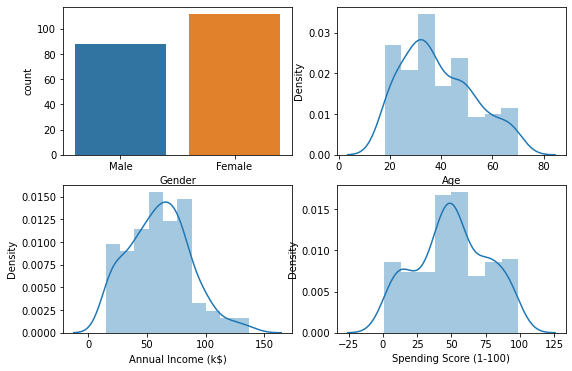

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2)
fig.tight_layout
fig.set_size_inches(9,6)

sns.countplot(df['Gender'], ax=axes[0,0])
sns.distplot(df['Age'], ax=axes[0,1])
sns.distplot(df.iloc[:,2], ax=axes[1,0])
sns.distplot(df.iloc[:,3], ax=axes[1,1])

In [12]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [15]:
features = df.values
features.shape

(200, 4)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

## Clustering

<AxesSubplot:>

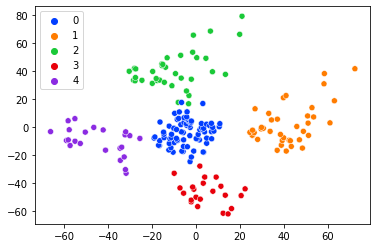

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans_cluster = kmeans.fit_predict(features)
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=kmeans_cluster, palette='bright')